In [1]:
# Name : Sanapala Satwika
# Roll no: 21ME10069

#Random Forest Regression (Boston Housing Dataset):

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

##Data preparation:

In [3]:
import pandas as pd
import numpy as np

# Fetch Boston housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [4]:
import random

# Combine features and target into a single array
data_with_target = np.column_stack([data, target])

# Randomly shuffle the data
random.shuffle(data_with_target)

shuffled_data = data_with_target[:, :-1]
shuffled_target = data_with_target[:, -1]

In [5]:
X, y = shuffled_data, shuffled_target

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

##Model Training and Hyperparameter Tuning:

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [7]:
# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'max_features': [int(np.log2(X.shape[1]))]
}

In [8]:
# Initialize Random Forest Regressor with criterion='squared_error'
rf_regressor = RandomForestRegressor(criterion='squared_error')

In [9]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15], 'max_features': [3],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [10]:
# Identify the best combination of hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'max_features': 3, 'n_estimators': 100}


##Evaluation:

In [11]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [12]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [13]:
#  Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5.666529785720499


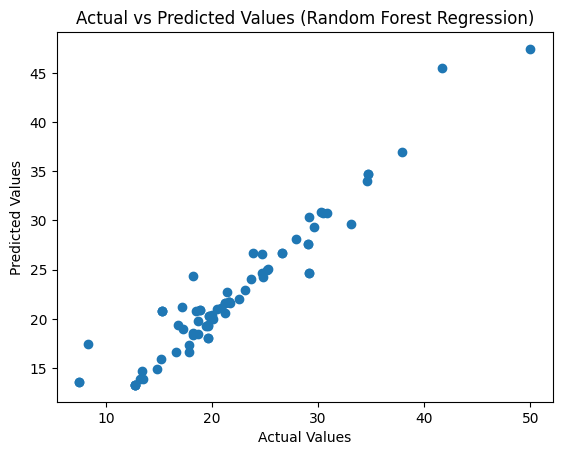

In [14]:
# scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest Regression)")
plt.show()

#AdaBoost Classification (Breast_Cancer Dataset):

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import numpy as np

##Data preparation:

In [16]:
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [17]:
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

##Model training and hyperparameter tuning:

In [18]:
# AdaBoost Classifier from scratch
class AdaBoostClassifier:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        m = X.shape[0]
        weights = np.ones(m) / m

        for _ in range(self.n_estimators):
            model = DecisionTreeClassifier(max_depth=1)
            model.fit(X, y, sample_weight=weights)
            predictions = model.predict(X)
            error = weights.dot(predictions != y)
            alpha = 0.5 * np.log((1 - error) / (error + 1e-10))
            weights = weights * np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)

            self.models.append(model)
            self.alphas.append(alpha)

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for model, alpha in zip(self.models, self.alphas):
            predictions += alpha * model.predict(X)
        return np.sign(predictions)

In [19]:
# Model training and hyperparameter tuning for custom implementation
best_accuracy = 0
best_n_estimators_custom = None
for n_estimators in [50, 100, 150]:
    model = AdaBoostClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = np.mean(y_pred == y_val)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators_custom = n_estimators

##Evaluation:

In [20]:
# Evaluation with trained model corresponding to best hyperparameters
best_model_custom = AdaBoostClassifier(n_estimators=best_n_estimators_custom)
best_model_custom.fit(X_train, y_train)
y_pred_custom = best_model_custom.predict(X_test)
print("Custom AdaBoost Classifier:")
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

Custom AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.94      0.97      0.95        60

    accuracy                           0.93        86
   macro avg       0.93      0.91      0.92        86
weighted avg       0.93      0.93      0.93        86

Confusion Matrix:
[[22  4]
 [ 2 58]]


##Comparison with sklearn’s implementation of Adaboost Classifier:

In [21]:
from sklearn.ensemble import AdaBoostClassifier as SklearnAdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [22]:
# Hyperparameter tuning using GridSearchCV for sklearn's implementation
param_grid = {'n_estimators': [50, 100, 150]}
grid_search = GridSearchCV(SklearnAdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3)
grid_search.fit(X_train, y_train)
best_n_estimators_sklearn = grid_search.best_params_['n_estimators']
best_model_sklearn = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [23]:
# Evaluation with sklearn's implementation
y_pred_sklearn = best_model_sklearn.predict(X_test)
print("\nSklearn's AdaBoost Classifier:")
print(classification_report(y_test, y_pred_sklearn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sklearn))


Sklearn's AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.98      0.99        60

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86

Confusion Matrix:
[[26  0]
 [ 1 59]]


In [24]:
# Comparison of results
print("\nComparison of Results:")
print(f"Best number of weak learners (from scratch implementation): {best_n_estimators_custom}")
print(f"Best number of weak learners (sklearn's implementation): {best_n_estimators_sklearn}")


Comparison of Results:
Best number of weak learners (from scratch implementation): 50
Best number of weak learners (sklearn's implementation): 100
